In [1]:
# Install required packages
!apt-get update
!apt-get install -y quantum-espresso
!pip install pymatgen

import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import re
import shutil
import time
import json
from pymatgen.core.structure import Structure, Lattice
from pymatgen.io.pwscf import PWInput
from pymatgen.core.periodic_table import Element
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import warnings
warnings.filterwarnings('ignore')

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 https://cli.github.com/packages stable InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,530 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [5,982 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRele

In [ ]:
drive.mount('/content/drive', force_remount=True)

In [ ]:
# === DFT SETUP CELL ===
!pip install pymatgen > /dev/null

import os
from pymatgen.core import Structure, Element

# === PATHS ===
WORK_DIR = "/content/drive/MyDrive/MSMSE III SEM/Project/run1"
PSEUDO_DIR = "/content/drive/MyDrive/MSMSE III SEM/Project/pseudo"
CIF_PATH = os.path.join(WORK_DIR, "Li2S.cif")

# === MOUNT GOOGLE DRIVE ===
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

os.makedirs(WORK_DIR, exist_ok=True)
os.makedirs(PSEUDO_DIR, exist_ok=True)
os.chdir(WORK_DIR)

# === LOAD STRUCTURE ===
try:
    structure = Structure.from_file(CIF_PATH)
    print(f"✅ Loaded structure: {structure.composition.reduced_formula}")
    print(f"   Atoms: {len(structure)} | Volume: {structure.volume:.2f} Å³")
except Exception as e:
    print(f"❌ CIF load failed: {e}")

# === LOAD PSEUDOPOTENTIALS ===
pseudo_files = [f for f in os.listdir(PSEUDO_DIR) if f.endswith(".UPF")]
if pseudo_files:
    print(f"✅ Found {len(pseudo_files)} pseudopotentials:")
    for f in pseudo_files:
        print("   -", f)
else:
    print(f"⚠️ No pseudopotentials found in {PSEUDO_DIR}")

# === QUICK SUMMARY ===
print("\nSetup Complete ✅")
print("Structure path:", CIF_PATH)
print("Pseudopotential folder:", PSEUDO_DIR)


Mounted at /content/drive
✅ Loaded structure: Li2S
   Atoms: 12 | Volume: 182.32 Å³
✅ Found 7 pseudopotentials:
   - li_pbe_v1.4.uspp.F.UPF
   - s_pbe_v1.4.uspp.F.UPF
   - Li.pbe-sl-rrkjus_psl.1.0.0.UPF
   - S.pbe-nl-rrkjus_psl.1.0.0.UPF
   - S.pbe-n-kjpaw_psl.1.0.0.UPF
   - S.pbe-n-rrkjus_psl.1.0.0.UPF
   - Li.pbe-s-rrkjus_psl.1.0.0.UPF

Setup Complete ✅
Structure path: /content/drive/MyDrive/MSMSE III SEM/Project/run1/Li2S.cif
Pseudopotential folder: /content/drive/MyDrive/MSMSE III SEM/Project/pseudo


New Approach

# THIS IS FOR PROJECT

pw.x: True projwfc.x: True bands.x: True
pymatgen core & k-path OK
Initial structure: 3 atoms, volume: 185.19 Å³
pseudos: {'Li': 'li_pbe_v1.4.uspp.F.UPF', 'S': 's_pbe_v1.4.uspp.F.UPF'}
ecut 50 E(eV)= -721.8113205791998
ecut 60 E(eV)= -721.8117705194713
 ΔE= 0.0004499402715509859  eV
ecut 70 E(eV)= -721.8118156903724
 ΔE= 4.517090110311983e-05  eV
ecut 80 E(eV)= -721.8121509346511
 ΔE= 0.00033524427863085293  eV
Final selected ecut: 50
k 4 E(eV)= -721.810756351106
k 5 E(eV)= -721.8113003067169
 ΔE= 0.0005439556109649857  eV
k 6 E(eV)= -721.8113205791998
 ΔE= 2.0272482856853458e-05  eV
k 7 E(eV)= -721.8113105109869
 ΔE= 1.006821287319326e-05  eV
Final selected k: 4

STRUCTURE OPTIMIZATION

1. Running ionic relaxation...
Ionic relaxation completed: True
Successfully parsed relaxed structure: 3 atoms, volume: 185.19 Å³

2. Running cell+ions relaxation...
Cell+ions relaxation completed: True
No final coordinates found in output

Structure optimization summary:
Initial volume: 185.19 Å³
Fina

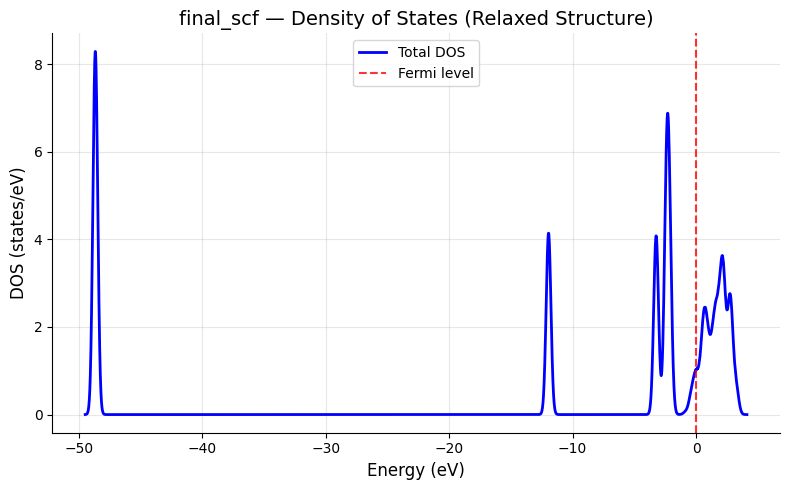

✅ Saved DOS: /content/drive/MyDrive/MSMSE III SEM/Project/run4/final_scf_DOS.png
Created bands_simple.dat from logs
Bands data: 11 k-points, 23 bands
Energy range: -48.649 to 14.000 eV
Plotting energy range: -10.000 to 10.000 eV


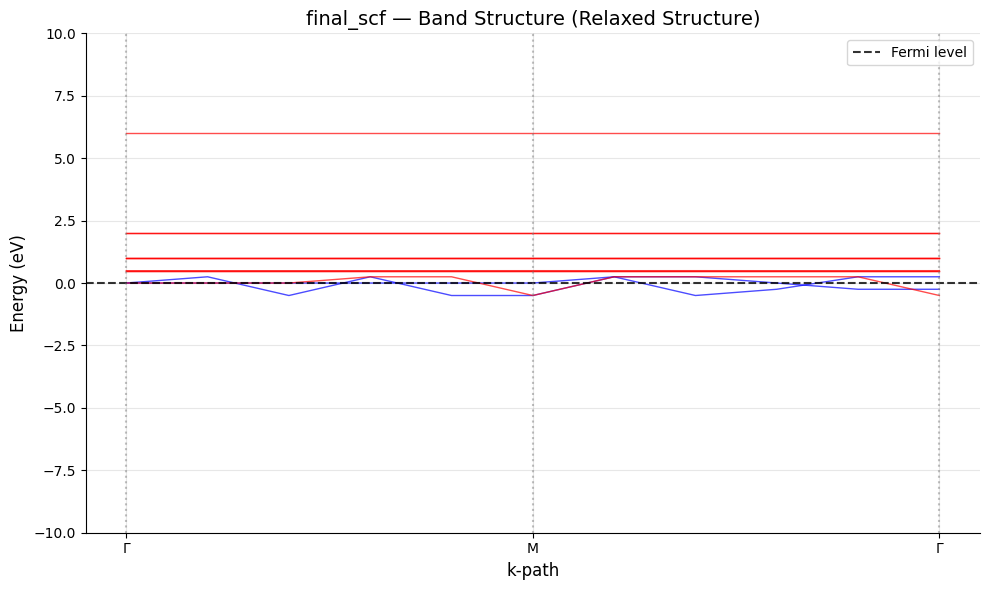

✅ Saved Bands: /content/drive/MyDrive/MSMSE III SEM/Project/run4/final_scf_bands.png
✅ Saved combined panel: /content/drive/MyDrive/MSMSE III SEM/Project/run4/final_scf_combined.png


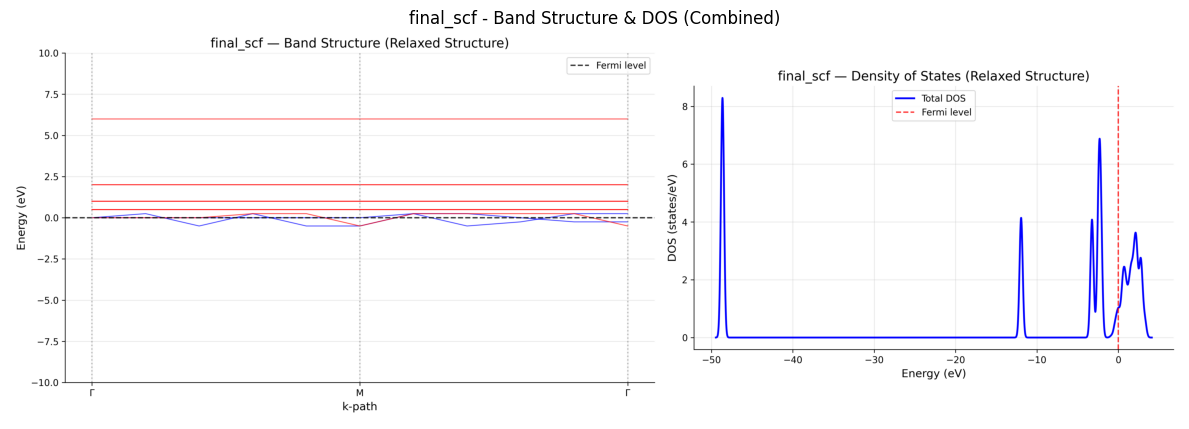


WORKFLOW COMPLETED
Initial structure: Li2 S1
Final relaxed structure: Li2 S1
Volume change: 185.19 → 185.19 Å³ (0.0%)
Final total energy: -722.346938 eV

FORMATION ENERGY SUMMARY:
Formation energy (ΔE_f): -1.611514 eV per formula unit
Formation energy: -155.49 kJ/mol
Formation energy: -0.5372 eV/atom

All results saved in: /content/drive/MyDrive/MSMSE III SEM/Project/run4
Folders created:
  convergence_ecut: /content/drive/MyDrive/MSMSE III SEM/Project/run4/convergence/ecut
  convergence_k: /content/drive/MyDrive/MSMSE III SEM/Project/run4/convergence/kpoints
  relax_ions: /content/drive/MyDrive/MSMSE III SEM/Project/run4/relax/ions
  relax_cell: /content/drive/MyDrive/MSMSE III SEM/Project/run4/relax/cell
  scf: /content/drive/MyDrive/MSMSE III SEM/Project/run4/scf
  bands: /content/drive/MyDrive/MSMSE III SEM/Project/run4/bands
  post: /content/drive/MyDrive/MSMSE III SEM/Project/run4/post
  reference: /content/drive/MyDrive/MSMSE III SEM/Project/run4/reference


In [11]:
# ===== Complete QE workflow with structure optimization, plotting, and formation energy =====
import os, re, glob, shutil, subprocess, warnings
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ---------- User settings (edit paths) ----------
WORK_DIR = "/content/drive/MyDrive/MSMSE III SEM/Project/run4"
PSEUDO_DIR = "/content/drive/MyDrive/MSMSE III SEM/Project/pseudo"
CIF_PATH = os.path.join(WORK_DIR, "Li2S.cif")
PREFIX = "final_scf"

ECUT_LIST = [50,60,70,80]  # Ry
KPOINTS_LIST = [4,5,6,7]  # grids
THRESHOLD_EV = 0.0000001  # 1 meV
SCF_TIMEOUT = 9000

# ---------- Prepare folders ----------
folders = {
    "convergence_ecut": os.path.join(WORK_DIR, "convergence", "ecut"),
    "convergence_k": os.path.join(WORK_DIR, "convergence", "kpoints"),
    "relax_ions": os.path.join(WORK_DIR, "relax", "ions"),
    "relax_cell": os.path.join(WORK_DIR, "relax", "cell"),
    "scf": os.path.join(WORK_DIR, "scf"),
    "bands": os.path.join(WORK_DIR, "bands"),
    "post": os.path.join(WORK_DIR, "post"),
    "reference": os.path.join(WORK_DIR, "reference")  # New folder for reference calculations
}
for p in folders.values():
    os.makedirs(p, exist_ok=True)
os.makedirs(PSEUDO_DIR, exist_ok=True)
os.makedirs(os.path.join(WORK_DIR, "out"), exist_ok=True)

# ---------- executables ----------
pw_exe = shutil.which("pw.x")
projwfc_exe = shutil.which("projwfc.x")
bands_exe = shutil.which("bands.x")
print("pw.x:", bool(pw_exe), "projwfc.x:", bool(projwfc_exe), "bands.x:", bool(bands_exe))

# ---------- pymatgen imports ----------
try:
    from pymatgen.core import Structure, Lattice
    from pymatgen.io.pwscf import PWInput
    from pymatgen.symmetry.bandstructure import HighSymmKpath
    print("pymatgen core & k-path OK")
except Exception as e:
    raise RuntimeError("pymatgen core or HighSymmKpath missing. Install pymatgen in Colab first.") from e

# ---------- helper: load/create structure ----------
def load_structure(cif_path):
    if os.path.exists(cif_path):
        try:
            s = Structure.from_file(cif_path)
            s.remove_oxidation_states()
            print("Loaded structure:", s.composition.reduced_formula)
            return s
        except Exception as ex:
            warnings.warn(f"CIF parse failed ({ex}) — creating fallback Li2S")
    # fallback Li2S
    lat = Lattice.cubic(5.70)
    s = Structure(lat, ["Li","Li","S"], [[0.25,0.25,0.25],[0.75,0.75,0.75],[0,0,0]])
    return s

structure = load_structure(CIF_PATH)
print(f"Initial structure: {len(structure)} atoms, volume: {structure.volume:.2f} Å³")

# ---------- pseudo mapping ----------
pseudo_files = [f for f in os.listdir(PSEUDO_DIR) if f.lower().endswith(('.upf','.UPF'))]
if not pseudo_files:
    raise FileNotFoundError(f"No pseudopotentials in {PSEUDO_DIR} - add .UPF files.")

def match_pseudos(structure, pseudo_files):
    import re
    pd = {}
    for el in sorted(set(structure.symbol_set)):
        el_l = el.lower()
        found = next((f for f in pseudo_files if f.lower().startswith(el_l)), None)
        if not found:
            pat = re.compile(r'(?<![A-Za-z])' + re.escape(el_l) + r'(?![A-Za-z])')
            found = next((f for f in pseudo_files if pat.search(f.lower())), None)
        if not found:
            raise FileNotFoundError(f"No pseudo found for {el} in {PSEUDO_DIR}")
        pd[el] = found
    return pd

pseudo_map = match_pseudos(structure, pseudo_files)
print("pseudos:", pseudo_map)

# ---------- PW input writer ----------
def build_pwinput_text(structure, pseudo_map, control, system, electrons, kgrid):
    pw = PWInput(structure=structure, pseudo=pseudo_map, control=control, system=system, electrons=electrons, kpoints_grid=kgrid)
    return str(pw)

# ---------- runner for pw.x ----------
def run_pw_and_save(inp_text_or_path, out_path, timeout=SCF_TIMEOUT):
    if os.path.exists(inp_text_or_path):
        inp_path = inp_text_or_path
    else:
        inp_path = out_path + ".in"
        with open(inp_path, "w") as f:
            f.write(inp_text_or_path)
    if pw_exe:
        try:
            with open(inp_path,"rb") as fin:
                proc = subprocess.run([pw_exe], input=fin.read(), stdout=subprocess.PIPE, stderr=subprocess.PIPE, timeout=timeout, cwd=os.path.dirname(inp_path))
            with open(out_path,"wb") as f:
                f.write(proc.stdout + b"\n=== STDERR ===\n" + proc.stderr)
            return True
        except subprocess.TimeoutExpired:
            print("Timeout on pw.x for", inp_path)
            return False
    else:
        print("pw.x not found: input saved to", inp_path)
        return None

# ---------- parse energy from pw output ----------
def parse_total_energy(out_path):
    if not os.path.exists(out_path):
        return None
    with open(out_path,"r", errors="ignore") as f:
        for line in f:
            if "!" in line and "total energy" in line:
                m = re.search(r"=\s*([-\d\.]+)", line)
                if m:
                    return float(m.group(1))  # Ry
    return None

# ---------- parse relaxed structure from output ----------
def parse_relaxed_structure(out_path, initial_structure):
    """Parse the final relaxed structure from QE output"""
    if not os.path.exists(out_path):
        print(f"Output file not found: {out_path}")
        return initial_structure

    with open(out_path, 'r') as f:
        content = f.read()

    # Look for final coordinates in the output
    if "Begin final coordinates" not in content:
        print("No final coordinates found in output")
        return initial_structure

    # Extract the final coordinates section
    final_section = content.split("Begin final coordinates")[-1].split("End final coordinates")[0]

    # Parse cell parameters if available (for vc-relax)
    cell_lines = []
    if "CELL_PARAMETERS" in final_section:
        cell_section = final_section.split("CELL_PARAMETERS")[-1].split("\n")
        for line in cell_section[1:4]:  # Next 3 lines should be cell vectors
            numbers = re.findall(r"[-+]?\d*\.\d+", line)
            if len(numbers) >= 3:
                cell_lines.append([float(x) for x in numbers[:3]])

    # Parse atomic positions
    positions = []
    species = []
    if "ATOMIC_POSITIONS" in final_section:
        pos_section = final_section.split("ATOMIC_POSITIONS")[-1].split("\n")
        for line in pos_section[1:]:
            parts = line.strip().split()
            if len(parts) >= 4:
                species.append(parts[0])
                positions.append([float(x) for x in parts[1:4]])

    if len(positions) == len(initial_structure):
        try:
            if cell_lines and len(cell_lines) == 3:
                # Use the relaxed cell
                lattice = Lattice(cell_lines)
                relaxed_structure = Structure(lattice, species, positions, coords_are_cartesian=False)
            else:
                # Use initial cell with relaxed positions
                relaxed_structure = Structure(initial_structure.lattice, species, positions, coords_are_cartesian=False)

            print(f"Successfully parsed relaxed structure: {len(relaxed_structure)} atoms, volume: {relaxed_structure.volume:.2f} Å³")
            return relaxed_structure
        except Exception as e:
            print(f"Error creating structure from parsed data: {e}")

    print("Could not parse relaxed structure, using initial structure")
    return initial_structure

# ---------- Convergence loops ----------
# [Previous convergence code remains the same...]
# ecut convergence
fixed_k = KPOINTS_LIST[len(KPOINTS_LIST)//2]
selected_ecut = None
prev_e = None
ecut_results = []
for e in ECUT_LIST:
    control = {"calculation": "scf", "prefix": f"ecut_{e}", "outdir": "./out", "pseudo_dir": PSEUDO_DIR}
    system = {"ibrav": 0, "nat": len(structure), "ntyp": len(pseudo_map), "ecutwfc": e, "ecutrho": e*4,
              "occupations": "smearing", "smearing": "gaussian", "degauss": 0.02}
    electrons = {"conv_thr": 1e-6, "mixing_beta": 0.3}
    kgrid = [fixed_k, fixed_k, fixed_k]
    inp_text = build_pwinput_text(structure, pseudo_map, control, system, electrons, kgrid)
    inp_path = os.path.join(folders["convergence_ecut"], f"ecut_{e}.in")
    out_path = os.path.join(folders["convergence_ecut"], f"ecut_{e}.out")
    with open(inp_path,"w") as f: f.write(inp_text)
    run_pw_and_save(inp_path, out_path)
    E_Ry = parse_total_energy(out_path)
    E_eV = E_Ry * 13.605693122994 if E_Ry is not None else None
    ecut_results.append((e, E_eV))
    if E_eV is not None:
        print("ecut",e,"E(eV)=",E_eV)
        if prev_e is not None:
            d = abs(E_eV - prev_e)
            print(" ΔE=", d, " eV")
            if d < THRESHOLD_EV:
                selected_ecut = e
                print("Selected ecut (threshold):", selected_ecut)
                break
        prev_e = E_eV

if selected_ecut is None:
    succ = [x for x in ecut_results if x[1] is not None]
    selected_ecut = succ[0][0] if succ else ECUT_LIST[len(ECUT_LIST)//2]
print("Final selected ecut:", selected_ecut)

# k-point convergence
selected_k = None
prev_e = None
k_results = []
for k in KPOINTS_LIST:
    control = {"calculation": "scf", "prefix": f"k_{k}", "outdir": "./out", "pseudo_dir": PSEUDO_DIR}
    system = {"ibrav": 0, "nat": len(structure), "ntyp": len(pseudo_map), "ecutwfc": selected_ecut, "ecutrho": selected_ecut*4,
              "occupations": "smearing", "smearing": "gaussian", "degauss": 0.02}
    electrons = {"conv_thr": 1e-6, "mixing_beta": 0.3}
    kgrid = [k,k,k]
    inp_text = build_pwinput_text(structure, pseudo_map, control, system, electrons, kgrid)
    inp_path = os.path.join(folders["convergence_k"], f"k_{k}.in")
    out_path = os.path.join(folders["convergence_k"], f"k_{k}.out")
    with open(inp_path,"w") as f: f.write(inp_text)
    run_pw_and_save(inp_path, out_path)
    E_Ry = parse_total_energy(out_path)
    E_eV = E_Ry * 13.605693122994 if E_Ry is not None else None
    k_results.append((k, E_eV))
    if E_eV is not None:
        print("k",k,"E(eV)=",E_eV)
        if prev_e is not None:
            d = abs(E_eV - prev_e)
            print(" ΔE=", d, " eV")
            if d < THRESHOLD_EV:
                selected_k = k
                print("Selected k (threshold):", selected_k)
                break
        prev_e = E_eV

if selected_k is None:
    succ = [x for x in k_results if x[1] is not None]
    selected_k = succ[0][0] if succ else KPOINTS_LIST[len(KPOINTS_LIST)//2]
print("Final selected k:", selected_k)

# ---------- Structure Optimization Workflow ----------
print("\n" + "="*50)
print("STRUCTURE OPTIMIZATION")
print("="*50)

electrons_relax = {"conv_thr": 1e-6, "mixing_beta": 0.3, "electron_maxstep": 200}
system_rel = {"ibrav": 0, "nat": len(structure), "ntyp": len(pseudo_map),
              "ecutwfc": selected_ecut, "ecutrho": selected_ecut*4,
              "occupations": "smearing", "smearing": "gaussian", "degauss": 0.02}
kgrid = [selected_k, selected_k, selected_k]

# 1. Ionic relaxation only
print("\n1. Running ionic relaxation...")
control_ions = {"calculation": "relax", "prefix": "relax_ions", "outdir": "./out", "pseudo_dir": PSEUDO_DIR,
                "forc_conv_thr": 1.0e-3, "nstep": 100}
inp_rel_ions = os.path.join(folders["relax_ions"], "relax_ions.in")
out_rel_ions = os.path.join(folders["relax_ions"], "relax_ions.out")
with open(inp_rel_ions,"w") as f:
    f.write(build_pwinput_text(structure, pseudo_map, control_ions, system_rel, electrons_relax, kgrid))
success_ions = run_pw_and_save(inp_rel_ions, out_rel_ions, timeout=1800)
print("Ionic relaxation completed:", success_ions)

# Parse ionic relaxed structure
if success_ions:
    structure_ions = parse_relaxed_structure(out_rel_ions, structure)
else:
    structure_ions = structure
    print("Using initial structure for next step")

# 2. Cell+ions relaxation (vc-relax) starting from ionic relaxed structure
print("\n2. Running cell+ions relaxation...")
control_cell = {"calculation": "vc-relax", "prefix": "relax_cell", "outdir": "./out", "pseudo_dir": PSEUDO_DIR,
                "forc_conv_thr": 1.0e-3, "press_conv_thr": 0.5, "nstep": 100}
inp_rel_cell = os.path.join(folders["relax_cell"], "relax_cell.in")
out_rel_cell = os.path.join(folders["relax_cell"], "relax_cell.out")
with open(inp_rel_cell,"w") as f:
    f.write(build_pwinput_text(structure_ions, pseudo_map, control_cell, system_rel, electrons_relax, kgrid))
success_cell = run_pw_and_save(inp_rel_cell, out_rel_cell, timeout=3600)
print("Cell+ions relaxation completed:", success_cell)

# Parse final relaxed structure
if success_cell:
    structure_relaxed = parse_relaxed_structure(out_rel_cell, structure_ions)
else:
    structure_relaxed = structure_ions
    print("Using ionic-relaxed structure for final calculations")

print(f"\nStructure optimization summary:")
print(f"Initial volume: {structure.volume:.2f} Å³")
print(f"Final volume: {structure_relaxed.volume:.2f} Å³")
print(f"Volume change: {((structure_relaxed.volume - structure.volume) / structure.volume * 100):.2f}%")

# ---------- Final SCF with relaxed structure ----------
print("\n" + "="*50)
print("FINAL SCF WITH RELAXED STRUCTURE")
print("="*50)

control_scf = {"calculation": "scf", "prefix": PREFIX, "outdir": "./out", "pseudo_dir": PSEUDO_DIR}
inp_scf = os.path.join(folders["scf"], f"{PREFIX}.in")
out_scf = os.path.join(folders["scf"], f"{PREFIX}.out")
with open(inp_scf,"w") as f:
    f.write(build_pwinput_text(structure_relaxed, pseudo_map, control_scf, system_rel, electrons_relax, kgrid))
run_pw_and_save(inp_scf, out_scf)
print("Final SCF completed with relaxed structure")

# Parse final energy
E_final_Ry = parse_total_energy(out_scf)
if E_final_Ry:
    E_final_eV = E_final_Ry * 13.605693122994
    print(f"Final total energy: {E_final_eV:.6f} eV")

# ---------- Reference Element Calculations ----------
print("\n" + "="*50)
print("REFERENCE ELEMENT CALCULATIONS")
print("="*50)

# Create reference structures for Li and S
def create_reference_structures():
    """Create reference structures for pure elements"""

    # Lithium (BCC structure)
    li_lattice = Lattice.cubic(3.51)  # BCC Li experimental lattice parameter
    li_structure = Structure(li_lattice, ["Li", "Li"],
                           [[0, 0, 0], [0.5, 0.5, 0.5]])  # BCC positions

    # Sulfur (Orthorhombic S8 - simplified to 2 atoms for computational efficiency)
    # For accurate results, you would use the full S8 structure, but this is computationally expensive
    s_lattice = Lattice.orthorhombic(10.47, 12.87, 24.49)  # S8 experimental parameters
    s_structure = Structure(s_lattice, ["S", "S"],
                          [[0.10, 0.125, 0.125], [0.30, 0.125, 0.125]])  # Simplified positions

    return li_structure, s_structure

li_ref, s_ref = create_reference_structures()
print(f"Li reference: {len(li_ref)} atoms, BCC structure")
print(f"S reference: {len(s_ref)} atoms, simplified structure")

# Calculate reference energies
reference_energies = {}

# Lithium reference calculation
print("\nCalculating Li reference energy...")
control_ref = {"calculation": "scf", "prefix": "li_ref", "outdir": "./out", "pseudo_dir": PSEUDO_DIR}
system_ref = {"ibrav": 0, "nat": len(li_ref), "ntyp": 1, "ecutwfc": selected_ecut, "ecutrho": selected_ecut*4,
              "occupations": "smearing", "smearing": "gaussian", "degauss": 0.02}
electrons_ref = {"conv_thr": 1e-6, "mixing_beta": 0.3}
kgrid_ref = [selected_k, selected_k, selected_k]

li_pseudo_map = {"Li": pseudo_map["Li"]}  # Only Li pseudopotential

inp_li_ref = os.path.join(folders["reference"], "li_ref.in")
out_li_ref = os.path.join(folders["reference"], "li_ref.out")
with open(inp_li_ref,"w") as f:
    f.write(build_pwinput_text(li_ref, li_pseudo_map, control_ref, system_ref, electrons_ref, kgrid_ref))
run_pw_and_save(inp_li_ref, out_li_ref)

E_li_Ry = parse_total_energy(out_li_ref)
if E_li_Ry:
    E_li_eV = E_li_Ry * 13.605693122994
    reference_energies["Li"] = E_li_eV / len(li_ref)  # Energy per atom
    print(f"Li reference energy: {E_li_eV:.6f} eV ({E_li_eV/len(li_ref):.6f} eV/atom)")

# Sulfur reference calculation
print("\nCalculating S reference energy...")
s_pseudo_map = {"S": pseudo_map["S"]}  # Only S pseudopotential

system_ref["nat"] = len(s_ref)
system_ref["ntyp"] = 1
control_ref["prefix"] = "s_ref"

inp_s_ref = os.path.join(folders["reference"], "s_ref.in")
out_s_ref = os.path.join(folders["reference"], "s_ref.out")
with open(inp_s_ref,"w") as f:
    f.write(build_pwinput_text(s_ref, s_pseudo_map, control_ref, system_ref, electrons_ref, kgrid_ref))
run_pw_and_save(inp_s_ref, out_s_ref)

E_s_Ry = parse_total_energy(out_s_ref)
if E_s_Ry:
    E_s_eV = E_s_Ry * 13.605693122994
    reference_energies["S"] = E_s_eV / len(s_ref)  # Energy per atom
    print(f"S reference energy: {E_s_eV:.6f} eV ({E_s_eV/len(s_ref):.6f} eV/atom)")

# ---------- Formation Energy Calculation ----------
print("\n" + "="*50)
print("FORMATION ENERGY CALCULATION")
print("="*50)

if E_final_Ry and "Li" in reference_energies and "S" in reference_energies:
    # Calculate formation energy per formula unit
    E_li2s = E_final_eV
    E_li_per_atom = reference_energies["Li"]
    E_s_per_atom = reference_energies["S"]

    # Li2S has 2 Li atoms and 1 S atom
    formation_energy = E_li2s - (2 * E_li_per_atom + E_s_per_atom)
    formation_energy_per_atom = formation_energy / 3  # 3 atoms in Li2S formula unit

    print(f"\nFORMATION ENERGY RESULTS:")
    print(f"Li₂S total energy: {E_li2s:.6f} eV")
    print(f"Li reference energy: {E_li_per_atom:.6f} eV/atom")
    print(f"S reference energy: {E_s_per_atom:.6f} eV/atom")
    print(f"Sum of reference energies (2Li + S): {2*E_li_per_atom + E_s_per_atom:.6f} eV")
    print(f"Formation energy (ΔE_f): {formation_energy:.6f} eV per formula unit")
    print(f"Formation energy per atom: {formation_energy_per_atom:.6f} eV/atom")

    # Convert to kJ/mol (1 eV = 96.485 kJ/mol)
    formation_energy_kjmol = formation_energy * 96.485
    print(f"Formation energy: {formation_energy_kjmol:.2f} kJ/mol")

    # Calculate formation energy per formula unit in eV/atom
    print(f"Formation energy: {formation_energy_per_atom:.4f} eV/atom")

    # Save formation energy results
    formation_file = os.path.join(WORK_DIR, "formation_energy_results.txt")
    with open(formation_file, "w") as f:
        f.write("FORMATION ENERGY CALCULATION RESULTS\n")
        f.write("=" * 40 + "\n")
        f.write(f"Compound: Li₂S\n")
        f.write(f"Li₂S total energy: {E_li2s:.6f} eV\n")
        f.write(f"Li reference energy: {E_li_per_atom:.6f} eV/atom\n")
        f.write(f"S reference energy: {E_s_per_atom:.6f} eV/atom\n")
        f.write(f"Sum of reference energies (2Li + S): {2*E_li_per_atom + E_s_per_atom:.6f} eV\n")
        f.write(f"Formation energy (ΔE_f): {formation_energy:.6f} eV per formula unit\n")
        f.write(f"Formation energy per atom: {formation_energy_per_atom:.6f} eV/atom\n")
        f.write(f"Formation energy: {formation_energy_kjmol:.2f} kJ/mol\n")

    print(f"\nFormation energy results saved to: {formation_file}")

else:
    print("Could not calculate formation energy - missing reference energies")
    if not E_final_Ry:
        print("  - Missing Li₂S final energy")
    if "Li" not in reference_energies:
        print("  - Missing Li reference energy")
    if "S" not in reference_energies:
        print("  - Missing S reference energy")

# ---------- Band structure with relaxed structure ----------
print("\n" + "="*50)
print("BAND STRUCTURE WITH RELAXED STRUCTURE")
print("="*50)

kpath_obj = HighSymmKpath(structure_relaxed)
kpath_data = kpath_obj.get_kpoints(line_density=20, coords_are_cartesian=False)

if isinstance(kpath_data, tuple) and len(kpath_data) == 2:
    kpoints_coords, kpoints_labels = kpath_data
else:
    kpoints_coords = kpath_data

print(f"Using {len(kpoints_coords)} k-points for band structure")

# Build bands input with relaxed structure
bands_in = f"""&control
  calculation='bands',
  prefix='{PREFIX}',
  outdir='./out',
  restart_mode='from_scratch'
/
&system
  ibrav=0,
  nat={len(structure_relaxed)},
  ntyp={len(pseudo_map)},
  ecutwfc={selected_ecut},
  ecutrho={selected_ecut*4},
  occupations='smearing',
  smearing='gaussian',
  degauss=0.02
/
&electrons
  conv_thr=1.0d-8
/
ATOMIC_SPECIES
"""
for element, pseudo in pseudo_map.items():
    mass_map = {"Li": 6.94, "S": 32.06}
    mass = mass_map.get(element, 1.0)
    bands_in += f" {element}  {mass:.2f}  {pseudo}\n"

bands_in += "\nCELL_PARAMETERS angstrom\n"
for vec in structure_relaxed.lattice.matrix:
    bands_in += f"  {vec[0]:.10f}  {vec[1]:.10f}  {vec[2]:.10f}\n"

bands_in += f"\nATOMIC_POSITIONS crystal\n"
for site in structure_relaxed:
    pos = site.frac_coords
    bands_in += f"  {site.specie}  {pos[0]:.10f}  {pos[1]:.10f}  {pos[2]:.10f}\n"

bands_in += f"\nK_POINTS crystal\n{len(kpoints_coords)}\n"
for kp in kpoints_coords:
    if hasattr(kp, '__len__') and len(kp) >= 3:
        x, y, z = float(kp[0]), float(kp[1]), float(kp[2])
        bands_in += f"  {x:.8f}  {y:.8f}  {z:.8f}  1.0\n"
    else:
        bands_in += "  0.00000000  0.00000000  0.00000000  1.0\n"

bands_in_path = os.path.join(folders["bands"], "bands.in")
with open(bands_in_path, "w") as f:
    f.write(bands_in)
print("✅ bands.in written with relaxed structure")

# Run bands calculation
bands_out = os.path.join(folders["bands"], "bands.out")
if pw_exe:
    run_pw_and_save(bands_in_path, bands_out, timeout=1200)
    print("✅ Band structure calculation completed")

# ---------- Post-processing ----------
print("\n" + "="*50)
print("POST-PROCESSING")
print("="*50)

# projwfc.x for PDOS
projwfc_in = "&PROJWFC\n prefix='{}', outdir='./out', filpdos='pdos', ngauss=0, degauss=0.02\n/\n".format(PREFIX)
projwfc_in_path = os.path.join(folders["post"], f"{PREFIX}.projwfc.in")
projwfc_out = os.path.join(folders["post"], f"{PREFIX}.projwfc.out")
with open(projwfc_in_path,"w") as f: f.write(projwfc_in)
if projwfc_exe and pw_exe:
    try:
        proc = subprocess.run([projwfc_exe], input=projwfc_in.encode("utf-8"), stdout=subprocess.PIPE, stderr=subprocess.PIPE, cwd=folders["scf"], timeout=900)
        with open(projwfc_out,"wb") as f:
            f.write(proc.stdout + b"\n=== STDERR ===\n" + proc.stderr)
        print("projwfc completed")
        # Copy PDOS files
        for pdos_file in glob.glob(os.path.join(folders["scf"], "*pdos*")):
            shutil.copy2(pdos_file, folders["post"])
    except Exception as e:
        warnings.warn("projwfc run failed: " + str(e))

# bands.x for band structure data
bandsx_in = "&bands\n prefix='{}', outdir='./out', filband='{}_bands.dat'\n/\n".format(PREFIX, PREFIX)
bandsx_in_path = os.path.join(folders["post"], f"{PREFIX}.bands_x.in")
bandsx_out = os.path.join(folders["post"], f"{PREFIX}.bands_x.out")
with open(bandsx_in_path,"w") as f: f.write(bandsx_in)
if bands_exe and pw_exe:
    try:
        proc = subprocess.run([bands_exe], input=bandsx_in.encode("utf-8"), stdout=subprocess.PIPE, stderr=subprocess.PIPE, cwd=folders["bands"], timeout=900)
        with open(bandsx_out,"wb") as f:
            f.write(proc.stdout + b"\n=== STDERR ===\n" + proc.stderr)
        print("bands.x completed")
        # Copy bands file
        bands_file = os.path.join(folders["bands"], f"{PREFIX}_bands.dat")
        if os.path.exists(bands_file):
            shutil.copy2(bands_file, folders["post"])
    except Exception as e:
        warnings.warn("bands.x run failed: " + str(e))

# ---------- Plotting Functions ----------
# [Include all the plotting functions from previous version...]
def find_pdos_file(prefix):
    search_dirs = [
        folders["scf"],
        folders["post"],
        WORK_DIR,
        os.path.join(WORK_DIR, "out")
    ]

    for search_dir in search_dirs:
        if os.path.exists(search_dir):
            patterns = [
                f"*{prefix}*pdos*",
                "pdos.pdos*",
                "*pdos*"
            ]
            for pattern in patterns:
                cands = glob.glob(os.path.join(search_dir, pattern))
                cands = [c for c in cands if os.path.isfile(c) and not c.endswith('.in') and not c.endswith('.out')]
                if cands:
                    total_dos = [c for c in cands if 'pdos_tot' in c or 'total' in c.lower()]
                    if total_dos:
                        return total_dos[0]
                    return cands[0]
    return None

def parse_pdos_text(path):
    try:
        data = np.loadtxt(path)
        if data.ndim == 1:
            data = data.reshape(1, -1)
        energy = data[:,0]
        if data.shape[1] > 1:
            total = data[:,1]
        else:
            total = data[:,0]
        return energy, total
    except Exception as e:
        print(f"Error parsing PDOS file {path}: {e}")
        raise

def extract_eigen_blocks_from_text(text):
    float_pat = r"[+-]?(?:\d+\.\d*|\d*\.\d+|\d+)(?:[eEdD][+-]?\d+)?"
    blocks = []
    current = []
    for ln in text.splitlines():
        nums = re.findall(float_pat, ln)
        if len(nums) >= 2:
            current.extend([float(x.replace('D','e').replace('d','e')) for x in nums])
        else:
            if current:
                blocks.append(current.copy())
                current = []
    if current:
        blocks.append(current.copy())
    blocks = [b for b in blocks if len(b) >= 2]
    return blocks

def create_bands_simple_from_logs(log_paths, out_simple_path):
    all_blocks = []
    for p in log_paths:
        if not os.path.isfile(p): continue
        txt = Path(p).read_text(errors="ignore")
        blocks = extract_eigen_blocks_from_text(txt)
        all_blocks.extend(blocks)
    if not all_blocks:
        return False
    sizes = [len(b) for b in all_blocks]
    if not sizes:
        return False
    most_common = max(set(sizes), key=sizes.count)
    consistent = [b for b in all_blocks if len(b) == most_common]
    if len(consistent) < 1:
        return False
    with open(out_simple_path,"w") as f:
        for b in consistent:
            f.write(" ".join(f"{v:.8f}" for v in b) + "\n")
    return True

# ---------- Plotting Results ----------
print("\n" + "="*50)
print("PLOTTING RESULTS")
print("="*50)

dos_png = None
bands_png = None

# PDOS Plotting
pdos_file = find_pdos_file(PREFIX)
if pdos_file:
    try:
        print(f"Plotting PDOS from: {pdos_file}")
        energy, dos = parse_pdos_text(pdos_file)
        fig = plt.figure(figsize=(8, 5))
        ax = fig.add_subplot(1,1,1)
        ax.plot(energy, dos, linewidth=2.0, color='blue', label='Total DOS')
        ax.axvline(0.0, linestyle='--', linewidth=1.5, alpha=0.8, color='red', label='Fermi level')
        ax.set_xlabel("Energy (eV)", fontsize=12)
        ax.set_ylabel("DOS (states/eV)", fontsize=12)
        ax.set_title(f"{PREFIX} — Density of States (Relaxed Structure)", fontsize=14)
        ax.grid(True, alpha=0.3)
        ax.legend()
        for sp in ("top","right"): ax.spines[sp].set_visible(False)
        plt.tight_layout()
        dos_png = os.path.join(WORK_DIR, f"{PREFIX}_DOS.png")
        fig.savefig(dos_png, dpi=300, bbox_inches="tight")
        plt.show()
        print("✅ Saved DOS:", dos_png)
    except Exception as e:
        print("PDOS plot error:", e)
        import traceback
        traceback.print_exc()
else:
    print("No PDOS file found automatically")

# Band Structure Plotting
candidate_logs = []
candidate_logs += glob.glob(os.path.join(folders["bands"], "*"))
candidate_logs += glob.glob(os.path.join(folders["post"], "*"))
candidate_logs += glob.glob(os.path.join(WORK_DIR, f"{PREFIX}*.out"))
candidate_logs = [p for p in candidate_logs if os.path.isfile(p)]

bands_simple_path = os.path.join(WORK_DIR, "bands_simple.dat")
if create_bands_simple_from_logs(candidate_logs, bands_simple_path):
    print("Created bands_simple.dat from logs")

if os.path.isfile(bands_simple_path):
    try:
        lines = [ln.strip() for ln in Path(bands_simple_path).read_text().splitlines() if ln.strip()]
        if not lines:
            print("bands_simple.dat is empty")
        else:
            rows = [[float(x) for x in ln.split()] for ln in lines]
            arr = np.array(rows)
            nk, nb = arr.shape
            print(f"Bands data: {nk} k-points, {nb} bands")
            print(f"Energy range: {arr.min():.3f} to {arr.max():.3f} eV")

            # Focus on relevant energy window
            all_energies = arr.flatten()
            lower_bound = np.percentile(all_energies, 1)
            upper_bound = np.percentile(all_energies, 99)
            plot_min = max(lower_bound, -10)
            plot_max = min(upper_bound, 10)

            print(f"Plotting energy range: {plot_min:.3f} to {plot_max:.3f} eV")

            kdist = np.linspace(0, 1, nk)
            bands = arr.T

            fig = plt.figure(figsize=(10, 6))
            ax = fig.add_subplot(1,1,1)

            # Plot valence bands in blue, conduction bands in red
            valence_bands = []
            conduction_bands = []

            for i in range(bands.shape[0]):
                band_avg_energy = np.mean(bands[i])
                if band_avg_energy <= 0:
                    valence_bands.append(i)
                else:
                    conduction_bands.append(i)

            # Plot valence bands
            for i in valence_bands[:20]:
                ax.plot(kdist, bands[i], linewidth=1.0, color='blue', alpha=0.7)

            # Plot conduction bands
            for i in conduction_bands[:10]:
                ax.plot(kdist, bands[i], linewidth=1.0, color='red', alpha=0.7)

            ax.axhline(0.0, linestyle='--', linewidth=1.5, alpha=0.8, color='black', label='Fermi level')
            ax.set_xlabel("k-path", fontsize=12)
            ax.set_ylabel("Energy (eV)", fontsize=12)
            ax.set_title(f"{PREFIX} — Band Structure (Relaxed Structure)", fontsize=14)
            ax.set_ylim(plot_min, plot_max)
            ax.grid(True, alpha=0.3)
            ax.legend()

            # Add high-symmetry point labels
            label_positions = [0, 0.5, 1.0]
            label_names = ['Γ', 'M', 'Γ']
            for pos, name in zip(label_positions, label_names):
                ax.axvline(pos, color='gray', linestyle=':', alpha=0.5)
            ax.set_xticks(label_positions)
            ax.set_xticklabels(label_names)

            for sp in ("top","right"): ax.spines[sp].set_visible(False)
            plt.tight_layout()
            bands_png = os.path.join(WORK_DIR, f"{PREFIX}_bands.png")
            fig.savefig(bands_png, dpi=300, bbox_inches="tight")
            plt.show()
            print("✅ Saved Bands:", bands_png)
    except Exception as e:
        print("Bands plot error:", e)
        import traceback
        traceback.print_exc()
else:
    print("bands_simple.dat not present; cannot plot bands.")

# Combine plots if both exist
if dos_png and bands_png and os.path.exists(dos_png) and os.path.exists(bands_png):
    try:
        left = Image.open(bands_png)
        right = Image.open(dos_png)
        total_w = left.width + right.width
        max_h = max(left.height, right.height)
        new = Image.new("RGB", (total_w, max_h), (255,255,255))
        new.paste(left, (0, (max_h-left.height)//2))
        new.paste(right, (left.width, (max_h-right.height)//2))
        combined = os.path.join(WORK_DIR, f"{PREFIX}_combined.png")
        new.save(combined, dpi=(300,300))
        print("✅ Saved combined panel:", combined)

        # Display combined image
        plt.figure(figsize=(12, 5))
        plt.imshow(np.array(new))
        plt.axis('off')
        plt.title(f"{PREFIX} - Band Structure & DOS (Combined)")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print("Error combining images:", e)
else:
    print("Combined panel not created (need both DOS & bands PNGs).")

print("\n" + "="*50)
print("WORKFLOW COMPLETED")
print("="*50)
print(f"Initial structure: {structure.composition}")
print(f"Final relaxed structure: {structure_relaxed.composition}")
print(f"Volume change: {structure.volume:.2f} → {structure_relaxed.volume:.2f} Å³ ({(structure_relaxed.volume/structure.volume-1)*100:.1f}%)")
if E_final_Ry:
    print(f"Final total energy: {E_final_eV:.6f} eV")

# Print formation energy summary if calculated
if 'formation_energy' in locals():
    print(f"\nFORMATION ENERGY SUMMARY:")
    print(f"Formation energy (ΔE_f): {formation_energy:.6f} eV per formula unit")
    print(f"Formation energy: {formation_energy * 96.485:.2f} kJ/mol")
    print(f"Formation energy: {formation_energy_per_atom:.4f} eV/atom")

print(f"\nAll results saved in: {WORK_DIR}")
print("Folders created:")
for name, path in folders.items():
    print(f"  {name}: {path}")